In [1]:
import xedist
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

##  LZ 
Model is compared to background rate obtained from LZ simulations

In [31]:
# define tpc dimensions, (excluding reverse-field region and gas gap)
tpc = xedist.TPC(radius = 72.8, height = 145.6)

# define extra xenon due to gas and reverse field region:
rfr_height = 15 # cm
gas_gap_height = 0.8 # cm

# rough contamination levels of walls and PMTs (decays/area)
# Assume 10x rate from TPC than walls
# absolute numbers don't matter as we rescale to LZ total rate
wall_surface_area = 2*np.pi*tpc.radius*(tpc.height+rfr_height+gas_gap_height)
wall_decays_per_area = 1e-2

array_surface_area = np.pi*tpc.radius**2 
array_decays_per_area = 10e-2

Define sources: bottom PMTs, top PMTs, and walls

Only consider the 2,447 keV $\gamma$-ray from $^{214}$Bi (dominant BG in 0nBB ROI)

In [32]:
energy = 2447 # keV

bottom_pmts = xedist.DiskGammaSource(tpc.radius+0.1, -rfr_height, energy,
                              array_decays_per_area * array_surface_area)

top_pmts = xedist.DiskGammaSource(tpc.radius+0.1, tpc.height+gas_gap_height, energy, 
                           array_decays_per_area * array_surface_area)

tpc_walls = xedist.CylindricalGammaSource(tpc.radius+0.1, tpc.height+gas_gap_height+rfr_height, 
                                   (tpc.height-rfr_height+gas_gap_height)/2., energy,
                                   wall_decays_per_area * wall_surface_area)

Calculate spatial distribution. This might take a while if you generate 1000s of gammas and have a fine mesh for the TPC

In [33]:
rate = xedist.spatial_distribution(tpc, bottom_pmts, top_pmts, tpc_walls)

Text(0.5, 0, 'r$^2$ [cm$^2$]')

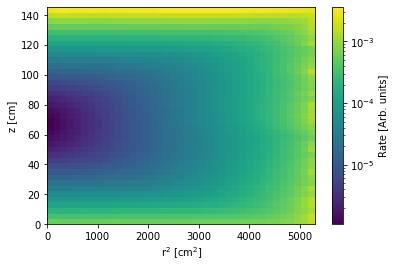

In [34]:
fig, ax = plt.subplots()

c = ax.pcolormesh(tpc.r2[:, 0, 0], tpc.z[0, 0, :], rate.T, norm=mpl.colors.LogNorm())
fig.colorbar(c, label='Rate [Arb. units]')
ax.set_ylabel('z [cm]')
ax.set_xlabel('r$^2$ [cm$^2$]')

Calculate rate as a function of fiducial mass. Compare to that obtained from LZ sims

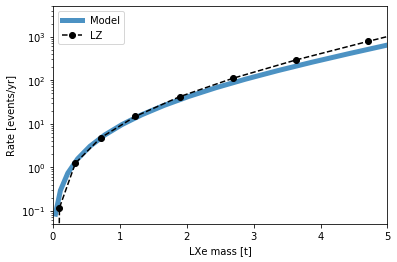

In [35]:
mass, diff_rate = xedist.get_cumulative_rate(rate, tpc)

fig, ax = plt.subplots()

ax.plot(mass, diff_rate, lw=5, alpha=.8, label='Model')

lz_rate = np.genfromtxt("data/lz_fv.txt")
ax.plot(lz_rate[::5, 0], lz_rate[::5, 1] * 365, ls='--', marker='o', c='black', label='LZ')
ax.set_yscale('log')
ax.set_ylim(5E-2, 5E3)
ax.set_xlim(0, 5)
ax.set_ylabel('Rate [events/yr]')
ax.set_xlabel('LXe mass [t]')
ax.legend()

# DARWIN

Compare model of DARWIN to that obtained from simulation https://arxiv.org/pdf/2003.13407.pdf

In [36]:
tpc = xedist.TPC(radius = 130, height = 260)

# assume similiar to LZ
rfr_height = tpc.height * 0.1
gas_gap_height = 0.8

# same contamination
wall_surface_area = 2*np.pi*tpc.radius*(tpc.height+rfr_height+gas_gap_height)
wall_decays_per_area = 1e-2

array_surface_area = np.pi*tpc.radius**2 
array_decays_per_area = 10e-2

In [37]:
energy = 2447 # keV

bottom_pmts = xedist.DiskGammaSource(tpc.radius+0.1, -rfr_height, energy, 
                              array_decays_per_area * array_surface_area)

top_pmts = xedist.DiskGammaSource(tpc.radius+0.1, tpc.height+gas_gap_height, energy, 
                           array_decays_per_area * array_surface_area)

tpc_walls = xedist.CylindricalGammaSource(tpc.radius+0.1, tpc.height+gas_gap_height+rfr_height, 
                                   (tpc.height-rfr_height+gas_gap_height)/2., energy, 
                                   wall_decays_per_area * wall_surface_area)

In [38]:
rate = xedist.spatial_distribution(tpc, bottom_pmts, top_pmts, tpc_walls)

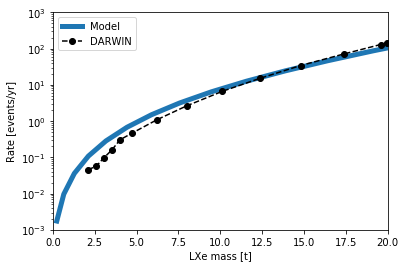

In [39]:
fig, ax = plt.subplots()

mass, diff_rate = xedist.get_cumulative_rate(rate, tpc)
ax.plot(mass, diff_rate, lw=5, label='Model')
ax.set_yscale('log')

darwin = np.genfromtxt("data/darwin_fv.txt", delimiter=',') # digitised from https://arxiv.org/pdf/2003.13407.pdf (units of events/tonne/yr/keV)
ax.plot(darwin[:,0], darwin[:,1] * darwin[:,0] * 50, ls='--', marker='o', c='black', label='DARWIN')

ax.set_xlim(0, 20)
ax.set_ylim(1E-3, 1E3)
ax.set_ylabel('Rate [events/yr]')
ax.set_xlabel('LXe mass [t]')
ax.legend()